# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Danielle Louis C. Dumas


_Student No._: 2021-09675


_Section_: THU-X3

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Danielle Louis C. Dumas

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



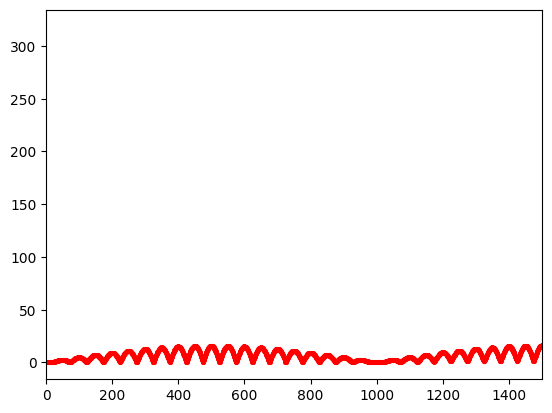

In [2]:
from numpy import zeros,loadtxt
from cmath import pi,exp,sin
from pylab import scatter,xlim,show, arange

N = 1000 #provided in the given
def y(n,N):#we are tasked to calculate the Fourier coefficients of this modulated sine wave
  return sin(pi*n/N)*sin(20*pi*n/N)
def dft(y):
  c = [] #this is just an empty set that will contain the coefficients obtained
  for k in range(N//2 +1): #This range allows to cover both even and odd N and produces the array that we need
    ck = 0
    for n in range(N): #This allows us to cover the summation that goes from n=0 to n=N-1
      ck += y(n,1000)*exp(-2j*pi*k*n/N) #eq. 7.24 in Newman's Computational Physics
      c.append(ck) #This fills up the empty set c to be used for plotting
  return c

c1 = dft(y)
c2 = [abs(c1) for c1 in dft(y)] #This allows us to find the absolute value for each c1 and plot
scatter(range(len(c2)), c2, s=7, color='red')
xlim(0,1500)
show()




### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [4]:
!ls drive/My\ Drive

 16627649920406240518126655501760.jpg
'1st Year 2nd Sem'
 20211027_183013.jpg
 20211115_115926.jpg
 20220110_160908.jpg
 20220908_001837.jpg
'2nd Sem Tracker.gdoc'
'2nd Year 1st Sem'
'2nd Year 2nd Sem'
 303322257_1262863754489039_1720265000390741030_n.jpg
 305530004_2579446675530292_6618928966044017890_n.jpg
 319160512_5793996993993553_2508332145630836008_n.jpg
'3rd Year 1st Sem'
 ACLE
 AirathePhysicsStudent.mp4
'Answer Key.gdoc'
 AP155
 ap181
 AP181
 Bio11
 Books
'CamScanner 04-04-2022 19.33_1.jpg'
'CamScanner 04-04-2022 19.33_2.jpg'
'CamScanner 07-13-2022 17.20_1.jpg'
'Characteristic Curves.gdoc'
'Chem 16.1'
 Classroom
'Colab Notebooks'
'Conforme and info sheet_English11_2023Sept_DUMAS_Danielle (1).pdf'
'Conforme and info sheet_English11_2023Sept_DUMAS_Danielle.gdoc'
'Conforme and info sheet_English11_2023Sept_DUMAS_Danielle.pdf'
'Conforme and info sheet_English11_2023Sept_FamilyName_FirstName.gdoc'
 Conquest
'Copy of Copy of [SP 128] T07.1 Hearing and Visual Impairments.docx'
'Copy 

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [5]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [6]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [7]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

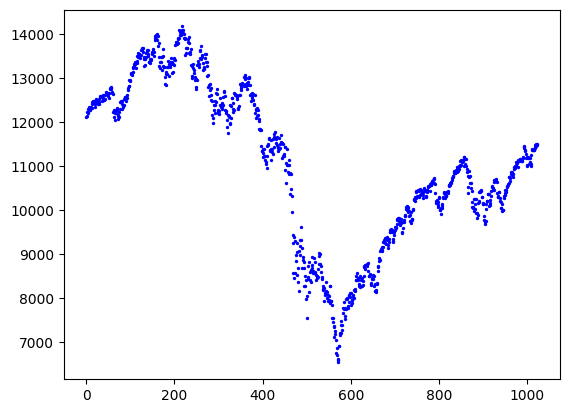

[ 1.12839039e+07+0.00000000e+00j  6.84127740e+05-9.55087519e+05j
 -4.19226205e+05+9.29089562e+04j  7.41901498e+04-2.73812250e+05j
 -3.51856811e+04+7.23658613e+04j  1.11482643e+05-3.14779807e+04j
  2.16752824e+04-2.45751549e+04j  1.11224416e+04+2.47975704e+04j
  3.11884665e+04+2.27868210e+04j  7.38523102e+03-3.21233427e+04j
 -3.39615972e+04-1.07833052e+05j -1.23569569e+04+2.73171276e+04j
  2.13837315e+04-9.16684147e+04j -4.32441725e+04+9.92294540e+04j
 -3.55753518e+03-2.54972743e+04j -3.04367677e+04-1.72551151e+04j
 -9.31799610e+03-2.49297658e+04j -9.35033325e+03-1.75612302e+04j
  1.17418062e+04+2.09235370e+04j  4.22549031e+04-2.38143067e+03j
  1.35294835e+04-3.06720066e+04j  4.06499470e+03-2.87140744e+04j
 -1.56146318e+04+2.24811825e+04j  1.35756353e+04-1.28123867e+04j
  1.20484888e+04+3.50866363e+03j -1.55111478e+04-1.70617041e+04j
  8.98307189e+03+4.49546331e+03j  4.42970647e+03+1.59761534e+03j
 -3.00967682e+04-3.74705070e+04j -1.96285643e+03-4.83894355e+03j
  2.97970267e+03-1.915635

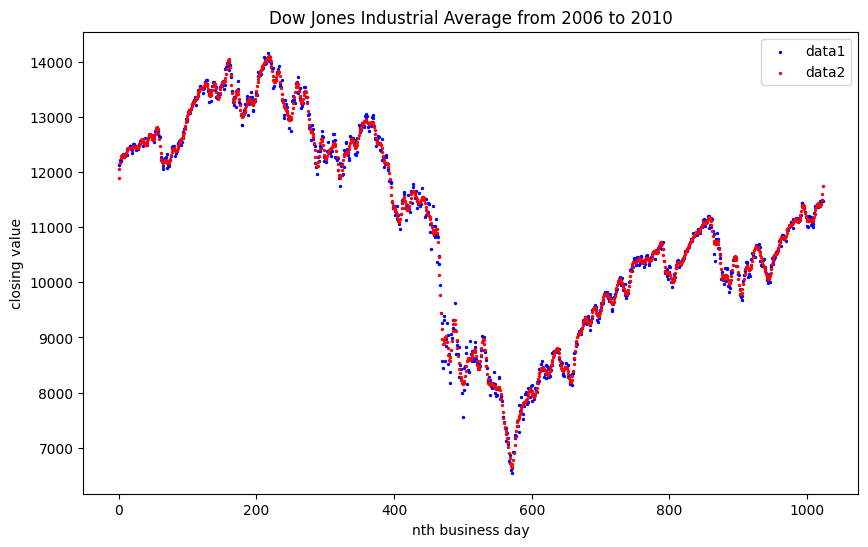

In [9]:
from numpy import fft,linspace
from pylab import plot,show,xlabel,ylabel, title ,scatter,figure,legend

#Plotting the given data on a graph
scatter(a, dow, s=8, color='blue', marker='.')
show()

#Finding the Fourier transform of the given data set
N = len(dow) #This just tells us how many elements are in the data set
a = range(N) #This converts the number of elements into a sequence of numbers that can be used for plotting
ft_dow = fft.rfft(dow) #Using the built-in function from numpy
ft1_dow = ft_dow #I just put this in order to differentiate the 1st tranform from the 2nd
print(ft1_dow)


#Setting the remaining 90% of elements to zero
L = int(0.1*N) #This allows us to separate the 10% from the remaining 90% the int function also accounts if we get a float number
fig = figure(figsize=(10,6))
ft_dow[L:] = 0 #This sets all elements from L to the last element to 0, which is around 90% of the total data set
ft2_dow = ft_dow #This is the new transform wherein only 10% of the elements are retained
dow2 = fft.irfft(ft2_dow) #Using the built-in function to inverse transform to get a 2nd version of dow which is dow2
b = range(len(dow2)) #This converts the number of elements into a sequence of numbers that can be used for plotting

#Plotting the two graphs
scatter(a, dow, s=8, color='blue', marker='.',label='data1')
scatter(b,dow2, s=8, color='red', marker='.',label='data2')
legend()
xlabel('nth business day')
ylabel('closing value')
title('Dow Jones Industrial Average from 2006 to 2010')
show()

print("I think that if we set the fourier coefficients to zero, then the amplitude of the wave becomes smaller, as seen in the plot.")
